## SVM (support vector machines)

christopher.overton@galvanize.com  
2016.10.05

### Conceptual framework:
### 1) $\triangle$ Max margin ("widest street") classifier (hard margin)
### 2) $\square$ Support vector classifier (soft margin)
### 3) $\bigcirc$ Support vector machine -> kernels

<img src='images/3d_sep.png' width=300px></img>

Credits:
- This presentation adapted most recently from Lee Murray's
- "ISLR": Some figures in this presentation are taken from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani  
[python code for this topic of ISLR](https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%209.ipynb)  
- "ESL": Some figures in this presentation are taken from "The Elements of Statistical Learning", 2nd edition (Springer 2009) with premission from the authors: T. Hastie, R. Tibshirani and J. Friedman
- code reference:
[sklearn.svm.SVC](http://scikit-learn.org/stable/modules/svm.html)

## Big picture:
- Good 2-way classifier, accuracy similar to logistic regression
- Only 'pays attention to' points near decision boundary (and on wrong side)
    * This may improve computation time
    * Don't spend penalty on points safely beyond margin
- Also usable as multi-way classifier

History and conceptual influence
* SVM's are the latest in a series of very influential algorithms
* It is instructive to see how the algorithms developed, and now might be eclipsed by others

General skills you need from today's work:
    - Hyperparameter tuning, including over grids
    - Understand the idea of constrained optimization
    - Know how to use the 'kernel trick'

## Support Vector Machines (SVM) - standards (I)
### Understand methodology; selection & implementation of models
*    Compute a hyperplane as a decision boundary in SVC
*    Explain what a support vector is in plain english
*    Recognize the need for preprocessing: make sure all predictors are on the same scale
*    Describe why generally speaking, an SVM with RBF kernel is more likely to perform well on “tall” data as opposed to “wide” data.  

## Support Vector Machines (SVM) - standards (II)

### Hyprparameter tuning
*    Tune a SVC using the hyperparameter, C
*    Tune a SVM with an RBF using both hyperparameters C and gamma
*    Tune a SVM with a polynomial kernel using both hyperparameters C and degree
*    For SVMs with RBF, what happens to bias and variance:  
        1) as we increase the hyperparameter “C”? 
        2) as we increase the hyperparameter “gamma”?
*    State how the “one-vs-one” and “one-vs-rest” approaches for multi-class problems are implemented.  

### Describe the kernel trick: ability to calculate as if high dimensional space

### Additional topics of importance
* Constrained optimization
    - In particular, *convex* optimization
    - The Lagrange multiplier method
    - Duality between primal and dual problems
    
See: https://en.wikipedia.org/wiki/Duality_(optimization)
        

## SVM (support vector machines) - Conceptual framework:
### 1) $\triangle$ Max margin ("widest street") classifier 
- Works when data are separable by a hyperplane

### 2) $\square$ Support vector classifier
- Optimizes within budget for misclassification, when there is no comfortable 'margin of error'
- Transform to dual problem allows clearer optimization

### 3) $\bigcirc$ Support vector machine -> kernels
- Same 'linear' approach works with nonlinear features, which are often just simple powers of original features
- 'Kernel trick' may pick out optimum using finite feature set taken from infinite possibiities

<img src='images/kernel.png' width=500px></img>

In [1]:
#setup
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression #for comparison
import pickle #CAUTION: Isaac says pickle's dangerous...
import json #not yet used in this file
from svm_ import find_support,plot_svm,plot_boundary

In [55]:
import os
os.chdir('data')
c1 = '#FF6DB6'
c2 = '#006DDB'
#del colors

In [3]:
# CAUTION: PICKLES CAN BE DANGEROUS!! MIGRATE TO JSON?
with open('svm_data.pkl','r') as f:
    x,y = pickle.load(f)
with open('svm_labels.pkl','r') as f:
    labels = pickle.load(f)

## 1) $\triangle$ Max margin ("widest street", "hard margin") classifier 
"I can drive a truck through your data!"

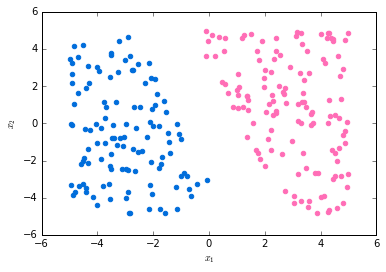

In [36]:
#Our first toy model
plt.scatter(x[labels==1],y[labels==1],color=c1,edgecolor=c1)
plt.scatter(x[labels==-1],y[labels==-1],color=c2,edgecolor=c2)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
pass

--> How can we classify these?

--> By the way, how do these data look 'fake' (simulated)?

## We want the best line that divides negative from positive

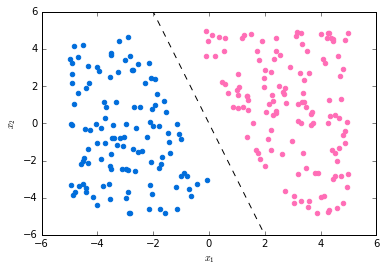

In [62]:
# One line that seems to work well...
v = np.linspace(-5,5)
plt.scatter(x[labels==1],y[labels==1],color=c1,edgecolor=c1)
plt.scatter(x[labels==-1],y[labels==-1],color=c2,edgecolor=c2)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.plot(v,-3*v,'k--')
plt.xlim(-6,6)
plt.ylim(-6,6)
pass

### --> Can we get a line like this from logistic regression?

## ${{1}\over{1+e^{-(\beta_0 + \beta_1 * x_1 + \beta_2 * x_2)}}} = t$
### $ e^{-(\beta_0 + \beta_1 * x_1 + \beta_2 * x_2)} = 1/t - 1 $
### $-( \beta_0 + \beta_1 * x_1 + \beta_2 * x_2) = ln(1/t-1) $  

To show this in  2-dim graph, substitute: $ x_2 => y, x_1 => x$
### $ y = -{ln(1/t-1)\over{\beta_2}}-({{\beta_1}\over{\beta_2}}x + {{\beta_0}\over{\beta_2}})$

In [41]:
v = np.linspace(-5,5,100)
def plot_decision(X,y,threshold=0.5,line_color='k'):
    colors = [c1 if i == 1 else c2 for i in y]
    m = LogisticRegression().fit(X,y)
    mod = np.log(1./threshold - 1)/m.coef_[0][1]
    slope = -1.*m.coef_[0][0]/m.coef_[0][1]
    intercept = -1.*m.intercept_[0]/m.coef_[0][1] + mod
    v = np.linspace(-5,5,100)
    plt.scatter(X[:,0],X[:,1],color=colors,edgecolor=colors)
    plt.plot(v,slope*v+intercept,color=line_color)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

    plt.ylim(-6,6)
    plt.xlim(-6,6)
    
    return slope,intercept

(-3.3145320685854536, -0.1074338242606209)

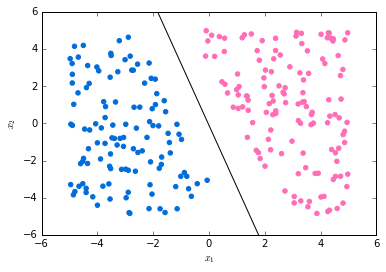

In [40]:
#Logistic decision boundary
X = np.array([x,y]).T
plot_decision(X,labels)

(-3.3145320685854536, 1.7636456850420497)

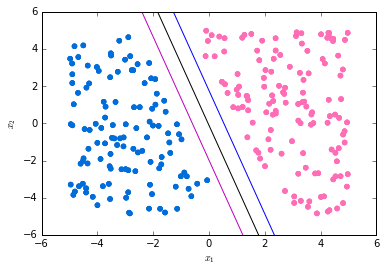

In [65]:
# --> What are the situations when each of the lines below would be preferable?
plot_decision(X,labels)
plot_decision(X,labels,0.8,'m')
plot_decision(X,labels,0.2,'b')

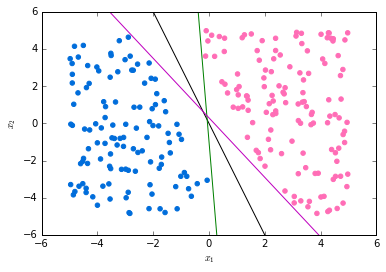

In [42]:
# --> Are the magenta and green lines here of any use?
colors = [c1 if i == 1 else c2 for i in labels]
plt.scatter(X[:,0],X[:,1],color=colors,edgecolor=colors)
plt.plot(v,-3.*v,'k')
plt.plot(v,-18*v-1,'g')
plt.plot(v,-1.6*v + 0.3,'m')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.ylim(-6,6)
pass

In fact there are an infinite number of lines that we could use

### What conditions might we want to impose on the line?

In [47]:
def make_plot(X):
    colors = [c1 if i == 1 else c2 for i in labels]
    plt.scatter(X[:,0],X[:,1],color=colors)

    plt.plot(v,-3*v-3.08,'k')
    plt.plot(v,-3*v + 3.08,'k')
    plt.plot(v,-3*v,'k--')

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

    plt.ylim(-6,6)
    pass


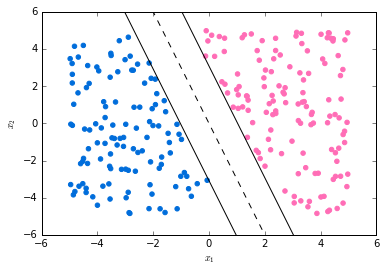

In [48]:
make_plot(X)

In [ ]:
--> What are benefits of having a large margin like this?

## How can we turn this idea into math?

For a (hyper)plane through the origin, with normal vector $\vec{\beta}$, and an unknown point $\vec{x_i}$:  
if $\vec{\beta} \cdot \vec{x_i} > 0$ then point $\vec{x_i}$ is on the same side of plane as $\vec{\beta}$   
if the plane is not through the origin, then there exists a $\beta_0$ such that:  
if $\vec{\beta} \cdot \vec{x_i} + \beta_0> 0$ then the point is on the side of plane in the direction of $\vec{\beta}$

Now code the oucome variable y for the two groups:  
$y_i = 1 \iff y_i \text{ is a positive example}$  
$y_i = -1 \iff y_i \text{ is a negative example}$

Then the following is true for all points on the correct side of the hyperplane:  
$y_i * (\vec{\beta} \cdot \vec{x_i} + \beta_0) \ge 0$  

If $||\beta|| = 1$, this calculates the perpendicular distance of the point from the line, with a negative value if the point is misclassified

### But what about the margin?

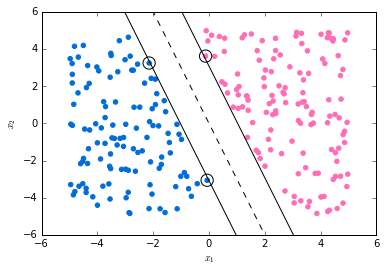

In [50]:
support,s_labels = find_support(X,-3,0)
make_plot(X)
plt.scatter(support[:,0],support[:,1],color='none',s=150,edgecolor='k')
pass

### How wide is the margin?

Take one "support" point on each margin.

Define $width = \text{projected}(\vec{x}_+ - \vec{x}_-)$, where $\vec{x}_+,\vec{x}_-$ are support vectors for positive or negative examples

But, this width might be angled across the street

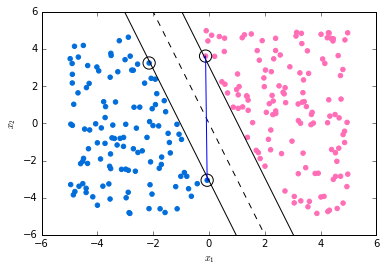

In [51]:
support,s_labels = find_support(X,-3,0)
make_plot(X)
plt.scatter(support[:,0],support[:,1],color='none',s=150,edgecolor='k')
plt.plot([support[0,0],support[1,0]],[support[0,1],support[1,1]])
pass

Then, lets define:  
$width_\bot = (\vec{x}_+ - \vec{x}_-) \cdot \vec{\beta}$

Lets try and be a little tricky:  
$y_+ * (\vec{x}_+ \cdot \vec{\beta} + \beta_0) = M$  
$y_- * (\vec{x}_- \cdot \vec{\beta} + \beta_0) = M$  
so:  
$\vec{x}_+ \cdot \vec{\beta} = M - \beta_0$  
$\vec{x}_- \cdot \vec{\beta} = -M + \beta_0$  
so:  
$width_\bot = M - \beta_0 + M + \beta_0)$  
$width_\bot = 2 M$

So we can assert we want:   
$y_i * (\vec{\beta} \cdot \vec{x_i} + \beta_0) \ge M$  
for all points $\vec{x_i}$ in our data set,  
and we want the largest margin size M that will work.

and:  
$y_i * (\vec{\beta} \cdot \vec{x}_i + \beta_0) = M \text{ for } \vec{x}_i \text{ on the margin}$  
on the margin is the point, or points, closest to the separating hyperplane  

So our maximization problem is:

<img src='images/max1.png' width=600px></img>

### First transformation: encode M within arbitrary $\beta$  
It turns out we can hide the M inside the choice of $\beta$ if remove the restriction $||\beta|| = 1$ and instead just define $M = 1/||\beta||$

Now, to make the biggest street possible we just need to maximize $2/||\beta||$  
or equivalently:  
minimize $\frac{1}{2}||\beta||^2$  
subject to $y_i(\vec{\beta} \cdot \vec{x} + \beta_0) \ge 1$  

### This is great, because now we are maximizing a convex function!

## --> how do we maximize/minimize functions with constraints?

The method of *Lagrange multipliers*  

If you are maximizing f(x) ('objective' function) and the constraint is written as g(x) = c, the solution will be a 'stationary point' of:
$$f(x) + \lambda \cdot g(x)$$

But you have just made things more complicated by adding the new variable $\lambda$.  

To find potential solutions, set derivatives equal to zero (including of $\lambda$.)  

In a solution, the gradient of the constraint (g(x)) will point in the same direction (plus or minus) as the gradient of the objective function.  

In a multivariate setting, you msy have multiple $\lambda$'s, and so the stationary point will require solution of a lrger system of equations.

Find stationary point (over $\beta$ and $\alpha_i$) of the Lagrange function:  
$$\mathscr{L} = \left(\frac{1}{2}\right) ||\beta||^2 - \sum_{i} \left[\alpha_i (y_i (\vec{\beta} \cdot \vec{x}_i + \beta_0)-1)\right]$$


after some math...

$$\max\limits_{\alpha \ge 0, \sum\limits_i[\alpha_i y_i] = 0} \left (\sum_{i} \alpha_i - \left(\frac{1}{2}\right) \sum_{i,j} \left[\alpha_i \alpha_j  y_i  y_j  (\vec{x}_i \cdot \vec{x}_j) \right]\right )$$  

Then, for an unknown point $\vec{u}$ we would check:  
$y_u = sign(\vec{\beta} \cdot \vec{u} + \beta_0)$  
  
we can update our prediction function to:  
$y_u = sign(\sum\limits_i [\alpha_i y_i (\vec{x}_i \cdot \vec{u})] + \beta_0)$

to calculate $\vec{\beta}$ and $\beta_0$:  
$ \vec{\beta} = \sum_\limits{i} [\alpha_i y_i \vec{x}_i] $  
$ \beta_0 = y_k - \vec{\beta} \cdot \vec{x}_k \text{ for any } \vec{x}_k \text{ with } \alpha_k \neq 0 $  

The minimization is now a quadratic optimization in $\alpha$.  
Importantly this, and the decision function, only depend on the dot products of our input data, we will talk more about what that means this afternoon

In [52]:
def plot_svc_decision(svc, show=True):
    # get the separating hyperplane
    w = svc.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (svc.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1. / np.sqrt(np.sum(svc.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(xx, yy, 'k--')
    plt.plot(xx, yy_down, 'k')
    plt.plot(xx, yy_up, 'k')
    
    if show:
        print 'slope of decision boundary: {}'.format(a)
        print 'margin width: {}'.format(2*margin)
#         plt.show()

slope of decision boundary: -3.03124335286
margin width: 2.0374353691


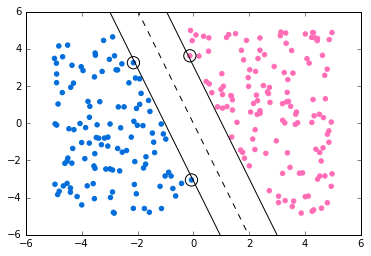

In [56]:
svc = SVC(kernel='linear')
svc.fit(X,labels)
colors = [c1 if i == 1 else c2 for i in labels]
plt.scatter(X[:,0],X[:,1],color=colors)
plot_svc_decision(svc,True)
svc_sp = svc.support_vectors_

plt.scatter(svc_sp[:,0],svc_sp[:,1],color='none',s=150,edgecolor='k')

plt.ylim(-6,6)
pass

In [25]:
print svc.support_vectors_
print '-'*28
print X[svc.support_]

[[-0.06832966 -3.05093567]
 [-2.14755115  3.2516902 ]
 [-0.12466102  3.62392409]]
----------------------------
[[-0.06832966 -3.05093567]
 [-2.14755115  3.2516902 ]
 [-0.12466102  3.62392409]]


In [26]:
print svc.coef_[0]
for ind in svc.support_:
    b = labels[ind]-svc.coef_[0].dot(X[ind])
    print b

[ 0.93220879  0.30753347]
0.00196233742785
0.00196247777742
0.00173215035777


### The need to normalize variables

slope of decision boundary: -4586.07699699
margin width: 1.56477482332


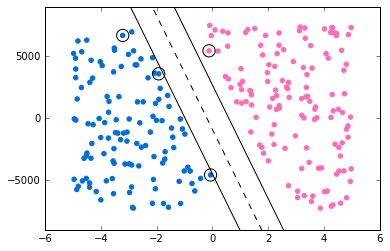

In [57]:
X[:,1] = X[:,1]*1500
svc = SVC(kernel='linear')
svc.fit(X,labels)

plt.scatter(X[:,0],X[:,1],color=colors)
plot_svc_decision(svc,True)
svc_sp = svc.support_vectors_

plt.scatter(svc_sp[:,0],svc_sp[:,1],color='none',s=150,edgecolor='k')

plt.ylim(-6*1500,6*1500)
X[:,1] = X[:,1]/1500

-->what's going on here?!

To avoid this, use pipline with a scaler like StandardScaler

In [29]:
print svc.support_vectors_
print svc.coef_[0]
print svc.intercept_

[[ -6.83296554e-02  -4.57640351e+03]
 [ -1.92740548e+00   3.57722018e+03]
 [ -3.21734263e+00   6.67573621e+03]
 [ -1.24661023e-01   5.43588614e+03]]
[  1.27813914e+00   2.78699888e-04]
[ 0.25518239]


## preview: individual assignment
comparison of SVM with logistic regression:  
* SVM uses 'hinge' loss function (red), while logistic uses binomial deviance (green)  
* yf < 1 indicates relative distance away from decision boundary for imperfectly classified points (yf < 0 means misclassified)
<img src='images/hingeLoss.png' width=700px></img>

## The agony and the ecstasy of SVM's:
(A preview for session 2) 

How would you separate the following?
(See next slide)

Even in higher dimensions, Max margin doesn't always work
(See slide at top of presentation)

## Working with more dimensions
A preview of the power of this method:

How would you separate the following?
<img src='images/how2sep.png' width = 500px></img>

What if you could add new features so the sets are separable within a higher dimensional space?
![](http://rvlasveld.github.io/images/oc-svm/visualization.gif)

# Afternoon

Recap: although there are tempting ways to expand features that allow complete separation, we saw how this can be difficult.

Before looking at adding features, we'll first discuss how to allow limited misclassifications

## 2) $\square$ Support vector classifier: soft margins

<img src='images/3d_sep.png' width=300px></img>

In [59]:
with open('svm_data_insep.pkl','r') as f:
    xi,yi = pickle.load(f)
with open('svm_labels_insep.pkl','r') as f:
    labelsi = pickle.load(f)
colorsi = [c1 if i == 1 else c2 for i in labelsi]

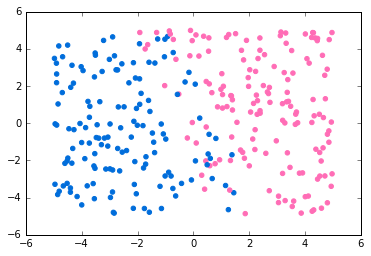

In [60]:
Xi = np.array([xi,yi]).T

plt.scatter(Xi[:,0],Xi[:,1],color=colorsi)
pass

### --> What now? Can we use maximum margin for this data?

Instead of looking at $y_i * (\vec{\beta} \cdot \vec{u} + \beta_0) \ge 1$,  
we use $y_i * (\vec{\beta} \cdot \vec{u} + \beta_0) \ge 1 - \xi_i$  

$\xi_i$ are called slack variables.  
  
They penalize samples that are either within the margin, or even on the wrong side of the boundary  
  
The resulting classifier, a soft-margin svm, now makes a tradeoff between maximizing correct classification and making the widest possible margin 

How do the slack variables $\xi_i$ interact with our original margin M?
![error budget](images/error_budget.png)

slope of decision boundary: -3.03220571229
margin width: 2.1192911378
accuracy: 0.91156462585


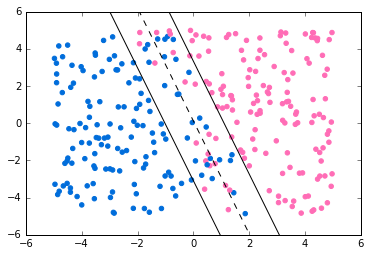

In [65]:
svc2 = SVC(C=1, kernel='linear')
svc2.fit(Xi,labelsi)

plt.scatter(Xi[:,0],Xi[:,1],color=colors)
plot_svc_decision(svc2,True)
# svc_sp = svc2.support_vectors_

# plt.scatter(svc_sp[:,0],svc_sp[:,1],color='none',s=150,edgecolor='k')
print 'accuracy: {}'.format(svc2.score(Xi,labelsi))
plt.ylim(-6,6)
pass

slope of decision boundary: -4.55698040957
margin width: 6.67282453939
accuracy: 0.91156462585


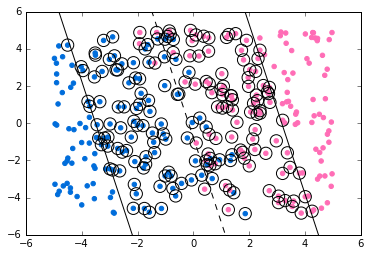

In [72]:
svc2 = SVC(C=.001,kernel='linear')
svc2.fit(Xi,labelsi)

plt.scatter(Xi[:,0],Xi[:,1],color=colors)
plot_svc_decision(svc2,True)
svc_sp = svc2.support_vectors_

plt.scatter(svc_sp[:,0],svc_sp[:,1],color='none',s=150,edgecolor='k')
print 'accuracy: {}'.format(svc2.score(Xi,labelsi))
plt.ylim(-6,6)
pass

So now, support vectors include all points within the margin

The optimization problem changes to:  
minimize: $\frac{1}{2}||\beta||^2 + C\sum\limits_i\xi_i$    
constraint: $y_i * (\vec{\beta} \cdot \vec{x_i} + \beta_0) \ge 1 - \xi_i$

### --> Look carefully at C above. what effect does it have?

### The dual form is related, but is more extensible:

$$\max\limits_{0 \le \alpha \le C, \sum\limits_i[\alpha_i y_i] = 0} \left (\sum_{i} \alpha_i - \left(\frac{1}{2}\right) \sum_{i,j} \left[\alpha_i \alpha_j  y_i  y_j  (\vec{x}_i \cdot \vec{x}_j) \right]\right )$$ 

This "dual objective function" is now minimized over the entire set of feasible points (i.e. without requiring additional constraints.)

We have introduced a maximum value on the alphas.

slope of decision boundary: -3.35355209319
margin width: 3.35545059012


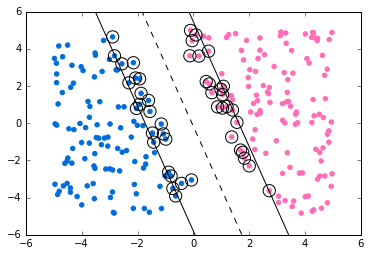

In [84]:
# Another view of our fist data set, this time with a soft margin
svct = SVC(C=0.01,kernel='linear')
svct.fit(X,labels)

plt.scatter(X[:,0],X[:,1],color=colors)
plot_svc_decision(svct,True)
svc_sp = svct.support_vectors_

plt.scatter(svc_sp[:,0],svc_sp[:,1],color='none',s=150,edgecolor='k')
plt.ylim(-6,6)
pass

--> The first margin already seemed wide. Why might we want this wider margin?

Below: same C, but on our second, 'messier' data set

slope of decision boundary: -3.35038341036
margin width: 3.40782152188


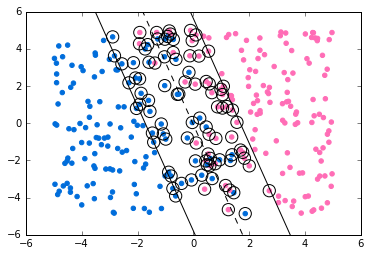

In [76]:
svct = SVC(C=0.01,kernel='linear')
svct.fit(Xi,labelsi)

plt.scatter(Xi[:,0],Xi[:,1],color=colors)
plot_svc_decision(svct,True)
svc_sp = svct.support_vectors_

plt.scatter(svc_sp[:,0],svc_sp[:,1],color='none',s=150,edgecolor='k')
plt.ylim(-6,6)
pass

## 3) $\bigcirc$ Support vector machine: kernels

Remember our optimization rule:  

$$\max\limits_{0 \le \alpha \le C, \sum\limits_i[\alpha_i y_i] = 0} \left (\sum_{i} \alpha_i - \left(\frac{1}{2}\right) \sum_{i,j} \left[\alpha_i \alpha_j  y_i  y_j  (\vec{x}_i \cdot \vec{x}_j) \right]\right )$$  

For the resulting choice of $\alpha$'s, our decision rule for a new vector $u$ becomes:  

$$y_u = sign(\sum\limits_i [\alpha_i y_i (\vec{x}_i \cdot \vec{u})] + \beta_0)$$

### The 'kernel trick'

Kernel functions allow us to get the result of the dot product of vectors after being transformed to a higher dimensional space, without actually needing to know what that transformation is  

$\Phi(\vec{x})$ is some transformation from space of dimension d to space of dimenstion d+n  
then $K(\vec{x}_1,\vec{x}_2) = \langle\Phi(\vec{x}_1),\Phi(\vec{x}_2)\rangle$

Our decision rule and optimization only depend on dot products between our input data. So we can use kernels act as dot products between data transform to higher dimensions, without having to explicitly compute the transformed data $\Phi(\vec{x})$.

There are many potential kernels to use, but some of the most common
are:  
  
a) linear:  
$K(\vec{x}_i,\vec{x}_j) = \vec{x}_i \cdot \vec{x}_j$  
  
b) polynomial (of degree d):  
$K(\vec{x}_i,\vec{x}_j) = (1 + \vec{x}_i \cdot \vec{x}_j)^d$  
  
c) radial basis function (gaussian), with "hyperparameter" gamma:  
$K(\vec{x}_i,\vec{x}_j) = \exp(-\gamma * ||\vec{x}_i - \vec{x}_j||^2)$

In the SVC command, these are specified respectively as kernel="linear", kernel="poly", and kernel="rbf" (which can be left out, because it's the default.)

# Hyperparameters: the data scientist's "secret sauce"

Hyperparameters are an important way to tune machine learning models  
So far, we have seen them as the $alpha$ penalty multiplier in regularized regression.  

Some model parameters are hard-coded (like the "squared" in MSE - why not use the fourth power?)  
When present as hyperparameters, there is likely no clear choice or theoretical argument on what is best.

In these cases, some experimentation is required.

If too much experimentation is required, the model probably has so many tunable paramaters that it may be unfocused and not optimally suited to its purpose.  

Ideally, each hyperparameter has an intuitive meaning that suggests an initial guess and sampling range.

Exact settings may vary across implementations and data sets, so besides data preparation and choice of model, this becomes a good candidate for model improvement!

## Hyperparameters for SVC in sklearn

* All kernel types have 'C', which is a penalty multiplier for slack variables $\xi_i$. It can be understood as a 'cost' of misclssification.  
* kernel='poly' has parameter *degree*, which determines the maximal degree of polynomial products of features
* kernel='rbf' has parameter *gamma*, which determines how quickly points lose their similarity as their distances from each other increase.

Today's pairs sprint tests these using GridSearch

Let's vary one at a time so see what effects they have.

## Mini case study: a more complicated data set

In [20]:
with open('rbf_data3.pkl','r') as f:
    x_rbf,y_rbf = pickle.load(f)
with open('rbf_labels3.pkl','r') as f:
     labels_rbf = pickle.load(f)
        
colors_rbf = [c1 if i == 1 else c2 for i in labels_rbf]
X_rbf = np.array([x_rbf,y_rbf]).T

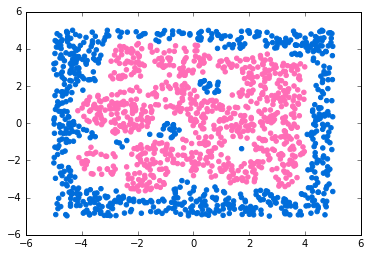

In [21]:
plt.scatter(X_rbf[:,0],X_rbf[:,1],color=colors_rbf)
pass

--> For this data set, how would polynomial kernels work?

### a) Linear svm fails badly on this data set

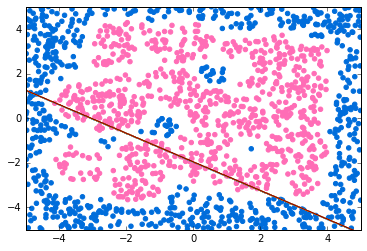

In [77]:
svm = SVC(C=.01,kernel="linear").fit(X_rbf,labels_rbf)
plot_boundary(svm,X_rbf)
plt.scatter(X_rbf[:,0],X_rbf[:,1],color=colors_rbf)

plt.xlim(-5,5)
plt.ylim(-5,5)
pass

### b) Polynomial kernel degree=2 or 4 helps a lot, but worse for degree=3!  


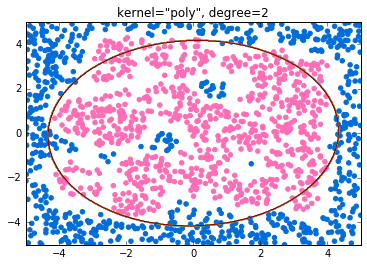

In [22]:
def rbf_fig(d):
    plt.figure()
    svm = SVC(C=1,kernel="poly",degree=d).fit(X_rbf,labels_rbf)
    plot_boundary(svm,X_rbf)
    plt.scatter(X_rbf[:,0],X_rbf[:,1],color=colors_rbf)
    plt.title('kernel="poly", degree=%i' % d)
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    pass

rbf_fig(2)

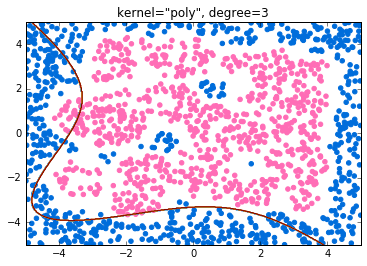

In [23]:
rbf_fig(3) #Much worse than for degree=2. Why?

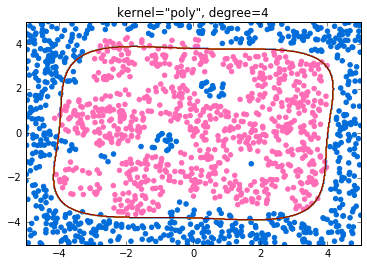

In [24]:
rbf_fig(4) #How does this compare to degree 2?

Interestingly, trying to compute this for degree=5 (rbf_fig(5)) crashed my notebook!

### c) If no kernel is specified, the default rbf is used, which in this case gives better results
### Let's compare the effect of varying c


--> switch from slide show to nb!

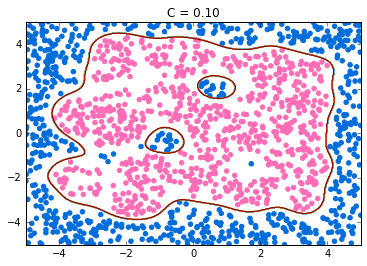

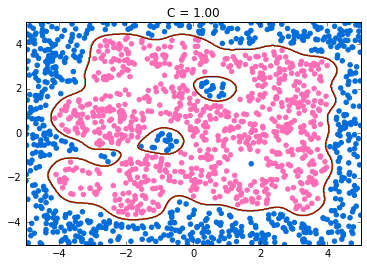

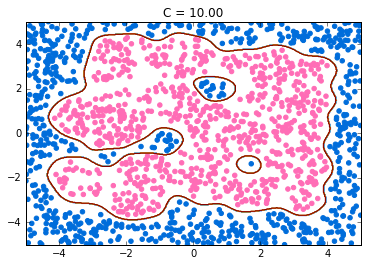

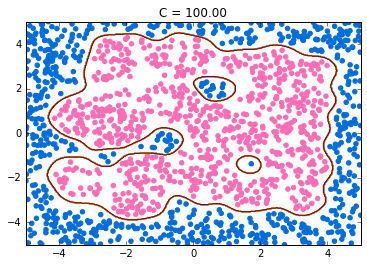

In [102]:
for c in [1E-1,1,10,100]:
    plt.figure()
    svm = SVC(C=c,gamma=3).fit(X_rbf,labels_rbf)
    plot_boundary(svm,X_rbf)
    plt.scatter(X_rbf[:,0],X_rbf[:,1],color=colors_rbf)
    plt.title('C = %2.2f' % c)
    plt.xlim(-5,5)
    plt.ylim(-5,5)

### Let's see the effect of varying gamma

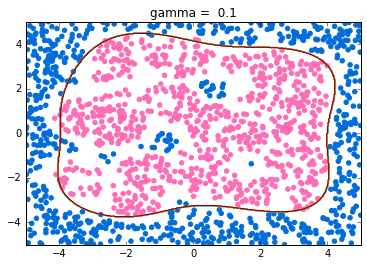

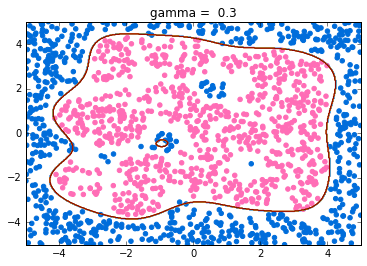

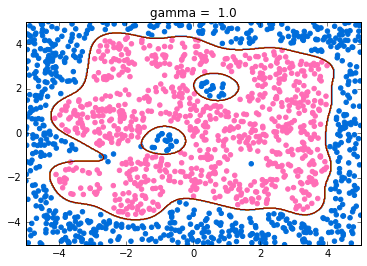

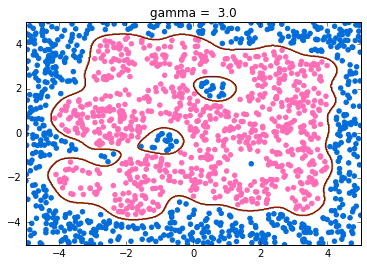

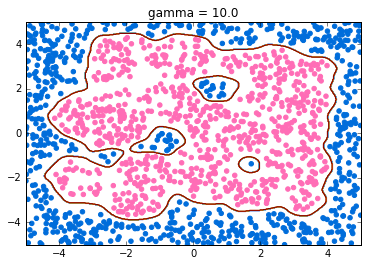

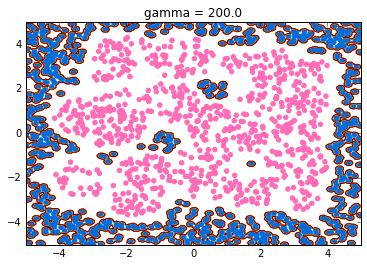

In [48]:
for g in [0.1,0.3,1,3,10,200]:
    plt.figure()
    svm = SVC(C=1,gamma=g).fit(X_rbf,labels_rbf)
    plot_boundary(svm,X_rbf)
    plt.scatter(X_rbf[:,0],X_rbf[:,1],color=colors_rbf)
    plt.title('gamma = %4.1f' % g)
    plt.xlim(-5,5)
    plt.ylim(-5,5)

--> What is going on here?

### Answer: this is massive overfitting!

Notice that in the earlier cumputations for varying C, gamma was set at 3, allowing plenty if 'wigglyness'.  
In addition to balancing gamma with C, we have to choose the kernel, which in the polynomial case has hyperparameter degree instead of gamma.

So how do we manage all these choices of hyperparameters?

## Grid search - when there are too many hyperparameter combinations to test individually

<img src="images/ryan_gridCode.png" width="400px" />
<img src="images/ryan_grid.png" width="400px" />

While grid_search can seem quite useful (and I have seen it in production pipelines), watch out for the possible combinatorial explosion. Here we only test $15^2 = 225$ combinations, but you can see how quickly this grows if you add more hyperparameters.

## Multiclass categorizers

Two main methods are used for multiclass svm:  
**one vs all:** train N models, assign points based on which model has largest value for $\vec{\beta} \cdot \vec{x} + \beta_0$    
**one vs one:** train $N * (N-1)\over{2}$ models, assign points based on highest vote of classes it has been assigned

## Speed/complexity

- Svm complexity is ~$O(\text{rows}^2 * \text{features})$, but is efficient in ignoring points far away from decision boundary
- Benefit: solution space can end up being very sparse, which is useful for situations where p >> n (but less so for RBF kernel) 

- Be careful using svm on very large data sets  
- The RBF kernel is very powerful when p < n, but also prone to overfitting, so use with caution.   

## "Off-label uses"
- SVM's have been an area of active research since their popularization in the 1990's
    - SVM clustering works by finding clusters isolated by high margins 
    - SVM regression  
    - You can include multiclass and cross validation scores in the dual space optimization algorithm
    - Getting probabilites out of svm models is artificial, but can be attempted  
        - On the other hand, models built to compute values related to probability (like log odds in logistic regression) might assume a structure that does not apply to your data. Thus, SVM's are worth an attempt even in these secondary uses.


## Established uses

- Weighting inversely to frequency (for training), single class svms can be used for anonomly/outlier detection (e.g. use class_weight in sklearn)  
- SVM's have been used with genomic data, which often have p >> n.
- SVM's have also been popular for NLP (text classification, based on the high-dimensional feature of words or even of combinations of words.)
    - It helps that the 'kernel trick' allows computing only $n^2$ document 'distances', rather than attempting to model the much higher-dimensional space of word combinations.
- SVM's fit well with problems with a natural sense of margin
    - For example, SVM's could work well for models where there are two clear classes, and then a zone of uncertain results requiring human verification (for example fraud detection.) You could then tune your parameters to get a margin that matches what types of samples you would want human follow-up.

### Preview of pairs project
Grid search: a neat tool, but can't fully replace understanding of algorithms and iterative solution improvement